# 1. Data Exploration and EDA

**Goal:** Load the **processed** data (after the pipeline has run), explore its structure, and generate initial visualizations like a word cloud.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pathlib import Path

%matplotlib inline

### 1. Load Processed Data
This notebook now reads the **output** of the `src/preprocessing.py` script, which is the cleaned and sentence-split data.

In [3]:
PROCESSED_FILE = Path("../data/processed/processed_reviews.csv")

if not PROCESSED_FILE.exists():
    print(f"ERROR: Processed file not found at {PROCESSED_FILE}")
    print("Please run your pipeline first! (e.g., 'python src/pipeline.py')")
else:
    df = pd.read_csv(PROCESSED_FILE, low_memory=False)
    print(f"Loaded {len(df)} rows from processed file.")
    display(df.head())

Loaded 31416 rows from processed file.


,source,title,title.1,title.2,text,text.1,published_at,published_at.1,published_at.2,url,__source_file,text_clean,__hash,sentences
0,NaN,Good Quality Dog Food,NaN,NaN,I have bought several of the Vitality canned d...,NaN,NaN,NaN,NaN,NaN,amazon.csv,Good Quality Dog Food. . . I have bought sever...,bd74afbe5a1e05e07a063e44216841467728ec3d,"['Good Quality Dog Food. . .', 'I have bought ..."
1,NaN,Not as Advertised,NaN,NaN,Product arrived labeled as Jumbo Salted Peanut...,NaN,NaN,NaN,NaN,NaN,amazon.csv,Not as Advertised. . . Product arrived labeled...,3af7f35044c1261e93e2b4033e7288f8ebed352c,"['Not as Advertised. . .', 'Product arrived la..."
2,NaN,"""Delight"" says it all",NaN,NaN,This is a confection that has been around a fe...,NaN,NaN,NaN,NaN,NaN,amazon.csv,"""Delight"" says it all. . . This is a confectio...",fc08a81d6dbef652cd076121eb95813426e2f729,"['""Delight"" says it all. . .', 'This is a conf..."
3,NaN,Cough Medicine,NaN,NaN,If you are looking for the secret ingredient i...,NaN,NaN,NaN,NaN,NaN,amazon.csv,Cough Medicine. . . If you are looking for the...,789dea92bd2ab0bf21a45b5ebfc698eb8edacdb1,"['Cough Medicine. .', '.', 'If you are looking..."
4,NaN,Great taffy,NaN,NaN,Great taffy at a great price. There was a wid...,NaN,NaN,NaN,NaN,NaN,amazon.csv,Great taffy. . . Great taffy at a great price....,778011ca790ff0f31e6c4b34426b71bfced99249,"['Great taffy. . .', 'Great taffy at a great p..."


In [4]:
if 'df' in locals():
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31416 entries, 0 to 31415
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source          0 non-null      float64
 1   title           10000 non-null  object 
 2   title.1         10755 non-null  object 
 3   title.2         10661 non-null  object 
 4   text            10000 non-null  object 
 5   text.1          10661 non-null  object 
 6   published_at    0 non-null      float64
 7   published_at.1  0 non-null      float64
 8   published_at.2  0 non-null      float64
 9   url             10661 non-null  object 
 10  __source_file   31416 non-null  object 
 11  text_clean      31416 non-null  object 
 12  __hash          31416 non-null  object 
 13  sentences       31416 non-null  object 
dtypes: float64(4), object(10)
memory usage: 3.4+ MB


### 2. Generate Word Cloud
Create a word cloud of the most frequent terms in the pre-cleaned **'text_clean'** column.

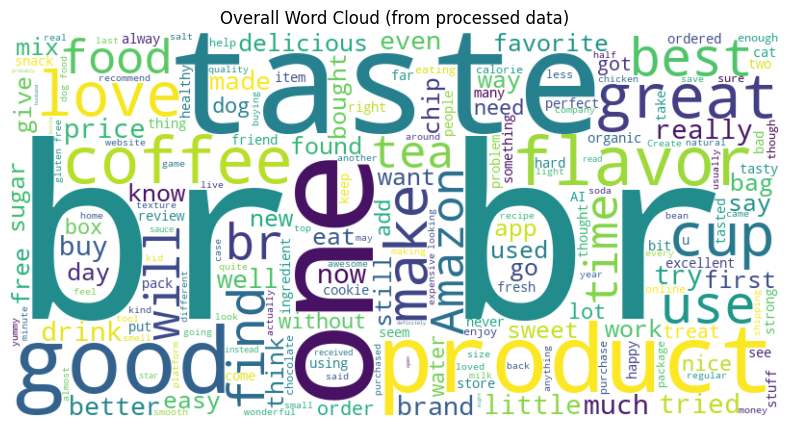

In [5]:
if 'df' in locals() and 'text_clean' in df.columns:
    # Fill any potential NaN values with an empty string
    all_text = " ".join(df['text_clean'].fillna("").tolist())
    
    if all_text.strip(): # Check if there is any text
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Overall Word Cloud (from processed data)')
        plt.show()
    else:
        print("No text data found to generate a word cloud.")
else:
    print("DataFrame 'df' not loaded or 'text_clean' column missing. Run previous cells.")